In [1]:
import pandas as pd
d=pd.read_csv("C:\\Users\\Downloads\\heart_disease_prediction.csv")
df=pd.DataFrame(d)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print(df.isna().sum()) # Display the Missing Values

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [5]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

<AxesSubplot:>

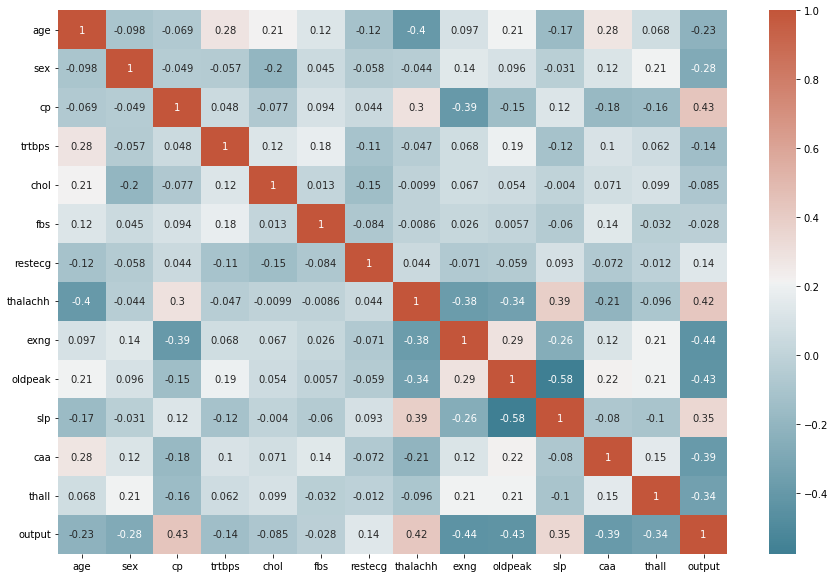

In [6]:
# calculate correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, annot=True,
cmap=sns.diverging_palette(220, 20, as_cmap=True))

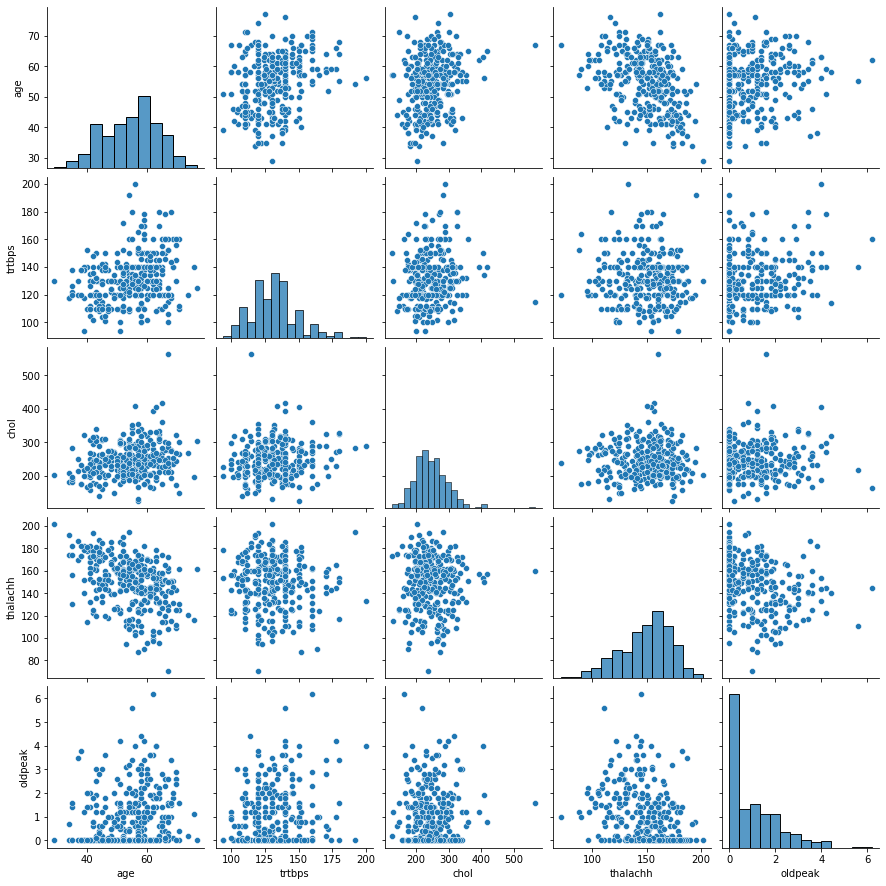

In [7]:
subData = df[['age','trtbps','chol','thalachh','oldpeak']]
sns.pairplot(subData)

Text(26.426458333333343, 0.5, 'ST depression')

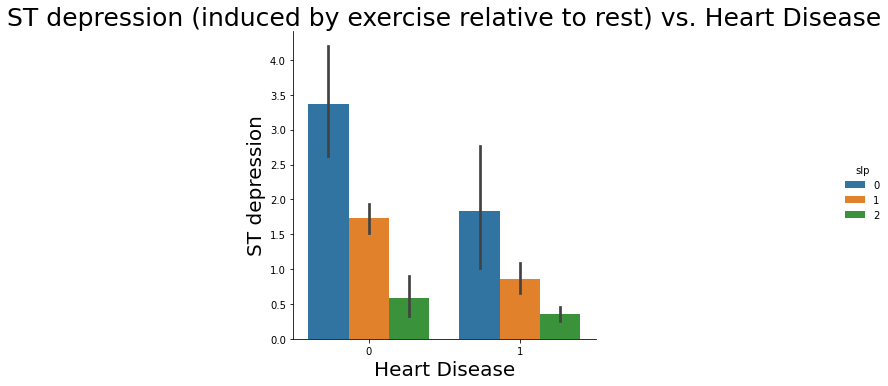

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x="output", y="oldpeak", hue="slp", kind="bar", data=df);

plt.title('ST depression (induced by exercise relative to rest) vs. Heart Disease',size=25)
plt.xlabel('Heart Disease',size=20)
plt.ylabel('ST depression',size=20)

Text(0, 0.5, 'Thalach Level')

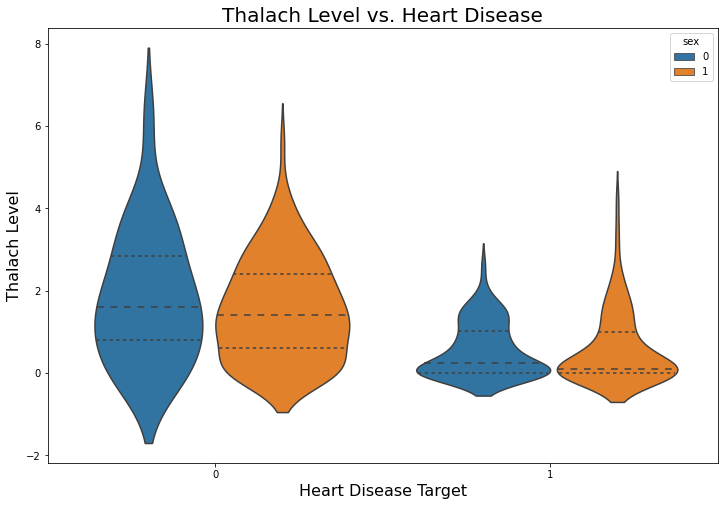

In [9]:
plt.figure(figsize=(12,8))
sns.violinplot(x= 'output', y= 'oldpeak',hue="sex", inner='quartile',data= df )
plt.title("Thalach Level vs. Heart Disease",fontsize=20)
plt.xlabel("Heart Disease Target", fontsize=16)
plt.ylabel("Thalach Level", fontsize=16)

Text(0, 0.5, 'ST depression induced by exercise relative to rest')

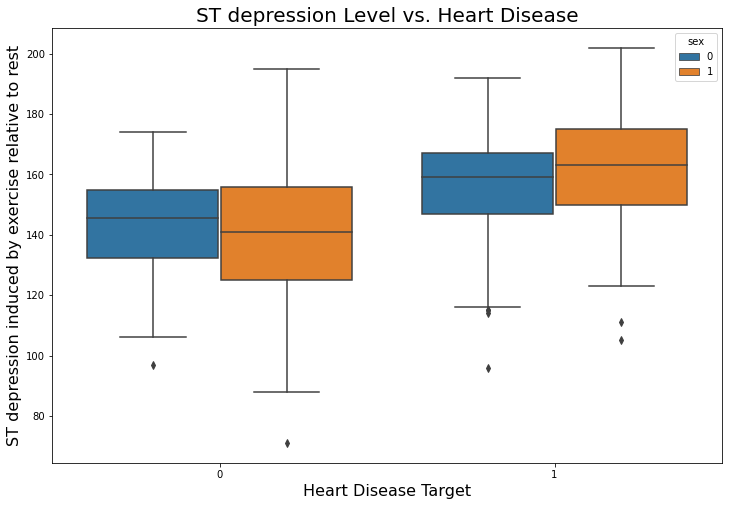

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x= 'output', y= 'thalachh',hue="sex", data=df)
plt.title("ST depression Level vs. Heart Disease", fontsize=20)
plt.xlabel("Heart Disease Target",fontsize=16)
plt.ylabel("ST depression induced by exercise relative to rest", fontsize=16)

In [11]:
# Filtering data by POSITIVE Heart Disease patient
pos_data = df[df['output']==1]
pos_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [17]:
# Filtering data by NEGATIVE Heart Disease patient
neg_data = df[df['output']==0]
neg_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [18]:
print("(Positive Patients ST depression): " + str(pos_data['oldpeak'].mean()))
print("(Negative Patients ST depression): " + str(neg_data['oldpeak'].mean()))

(Positive Patients ST depression): 1.5855072463768118
(Negative Patients ST depression): 1.5855072463768118


In [19]:
print("(Positive Patients thalachh): " + str(pos_data['thalachh'].mean()))
print("(Negative Patients thalachh): " + str(neg_data['thalachh'].mean()))

(Positive Patients thalachh): 139.1014492753623
(Negative Patients thalachh): 139.1014492753623


In [ ]:
MACHINE LEARNING + PREDICTIVE ANALYSIS

In [20]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
MODELING/TRAINING 

In [ ]:
MODEL1: LOGESTIC REGRESSION

In [23]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



In [ ]:
MODEL2: K-NN(K-NEAREST NEIGHBORS)

In [24]:
from sklearn.metrics import classification_report 
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier() # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy


              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
MODEL3: SVM(support vector machine)

In [25]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model3 = SVC(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
MODEL4: NAVIES BAYES CLASSIFIER

In [26]:
from sklearn.metrics import classification_report 
from sklearn.naive_bayes import GaussianNB

model4 = GaussianNB() # get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [ ]:
MODEL5: DECISION TREE

In [27]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model5 = DecisionTreeClassifier(random_state=1) # get instance of model
model5.fit(x_train, y_train) # Train/Fit model 

y_pred5 = model5.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred5)) # output accuracy

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        30
           1       0.70      0.68      0.69        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



In [ ]:
MODEL6: RANDOM FOREST

In [28]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model6 = RandomForestClassifier(random_state=1)# get instance of model
model6.fit(x_train, y_train) # Train/Fit model 

y_pred6 = model6.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred6)) # output accuracy

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
MODEL7: XGBOOST

In [30]:
from xgboost import XGBClassifier

model7 = XGBClassifier(random_state=1)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print(classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        30
           1       0.75      0.87      0.81        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [ ]:
MAKING THE CONFUSION MATRIX

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred6)
print(cm)
accuracy_score(y_test, y_pred6)

[[21  9]
 [ 3 28]]


0.8032786885245902